# H/A/Alpha decomposition

This notebook shows how to apply the H/A/Alpha decomposition to a PolSARpro NetCDF dataset.

In [1]:
%load_ext autoreload
%autoreload 2
import os 
from pathlib import Path
import xarray as xr
from polsarpro.io import open_netcdf_beam
from polsarpro.decompositions import h_a_alpha
from polsarpro.util import plot_h_alpha_plane

# optional import for progress bar
from dask.diagnostics import ProgressBar

# change to your data paths
# original dataset
input_alos_data = Path("/data/psp/test_files/SAN_FRANCISCO_ALOS1_slc.nc")
output_dir = Path("/data/psp/res")


## Load ALOS data and C outputs

We load the SNAP NetCDF-BEAM dataset using the `open_netcdf_beam` function. 
To obtain such a dataset, please refer to the "Getting Started" tutorial or the `quickstart-tutorial.ipynb` notebook.

In [2]:
# uncomment to test on S matrix made with SNAP
S = open_netcdf_beam(input_alos_data)

# Variables to compute. A list can be found in the API reference documentation.
out_names = ("entropy", "anisotropy", "alpha", "alphas")

## Apply the decomposition

Let's apply the decomposition and write the result to a NetCDF file.
Optionally we can use a progress bar to monitor the progress of the computation.

In [3]:
# change to the name of your liking
file_out = output_dir / "psp_h_a_alpha.nc"

# netcdf writer cannot overwrite
if os.path.isfile(file_out):
    os.remove(file_out)

with ProgressBar():
    h_a_alpha(S, boxcar_size=[7, 7], flags=out_names).to_netcdf(file_out)

[########################################] | 100% Completed | 106.94 s


# Display outputs

We open the previously saved dataset:

In [4]:
res = xr.open_dataset(file_out)

Then we may plot individual parameters:

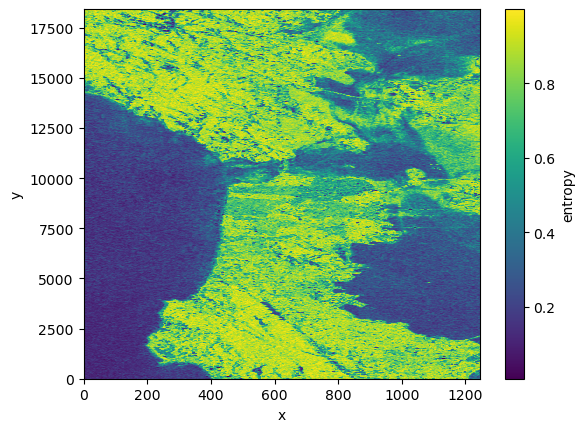

In [5]:
res.entropy.plot.imshow()

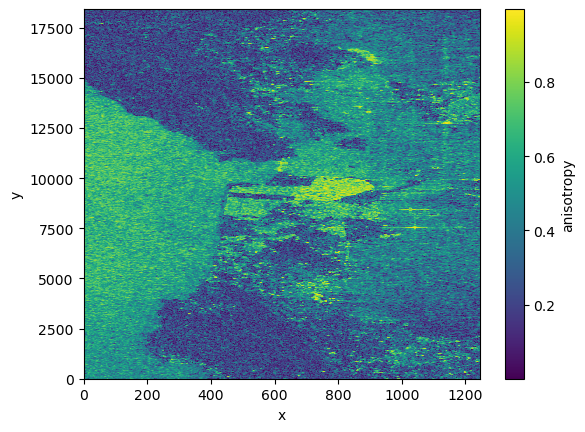

In [6]:
res.anisotropy.plot.imshow()

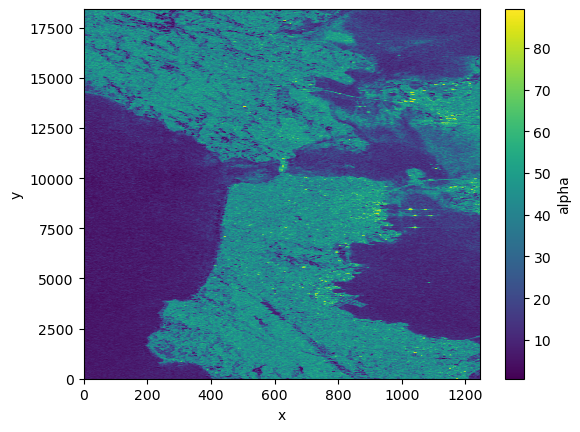

In [7]:
res.alpha.plot.imshow()

Let's plot the `alpha_i` angles corresponding to the `lambda_i` eigenvalues.
We may treat them as an RGB image by normalizing the data range between 0 and 1:

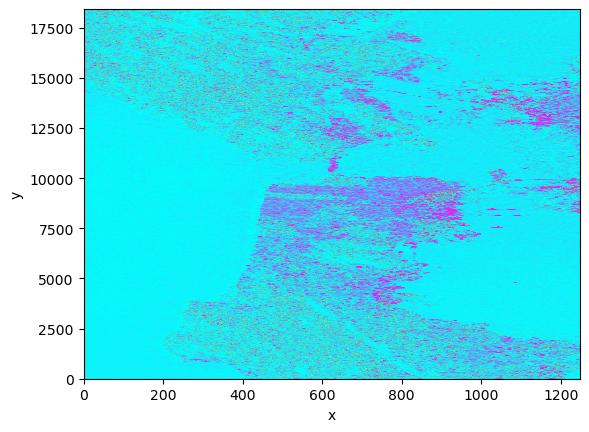

In [8]:
(res.alphas/90).plot.imshow()

or we may plot only one of them using numpy-like indexing:

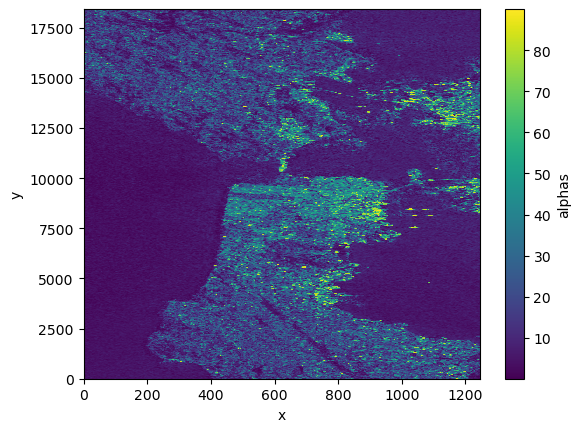

In [9]:
res.alphas[..., 0].plot.imshow()

Finally we can plot the data points in the H/Alpha plane and save the result to an image:

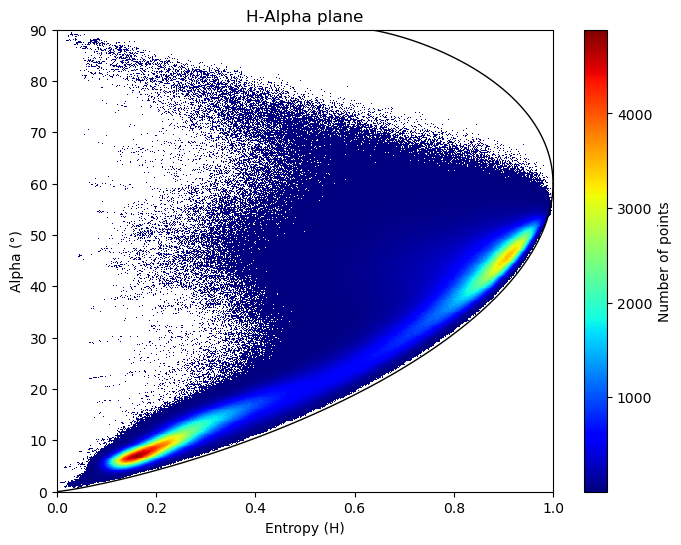

In [10]:
ax, fig = plot_h_alpha_plane(res, bins=500, min_pts=2)
fig.savefig(output_dir / "h_a_alpha_plane.png")